In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv(r"../Python ile Makine Öğrenmesi/Position_Salaries.csv")
data2 = data.copy()

In [5]:
data2.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [11]:
y = data2["Salary"]
X = data2["Level"]

# burada direktmen ekledik modellerimiz array yapıları ile çalışıyor 
# train test diye ayırdığımızda kendisi yapıyordu ama böyle direkt olarak 
# değişkenleri atadığımızda array a dönüşmeyecektir. Bu yüzden bunları array yapısına 
# bizim dönüştürmemiz lazım 

y = np.array(y).reshape(-1,1)
X = np.array(X).reshape(-1,1)

In [12]:
# burada bir standartlaştırma yapmamız gerekiyor aksi halde sağlıklı olmaz
scalery = StandardScaler()
scalerx = StandardScaler()
y = scalery.fit_transform(y)
X = scalerx.fit_transform(X)
# PCA dan farkı burada fit_transform uyguluyruz. 

c:\Users\Kemalettin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


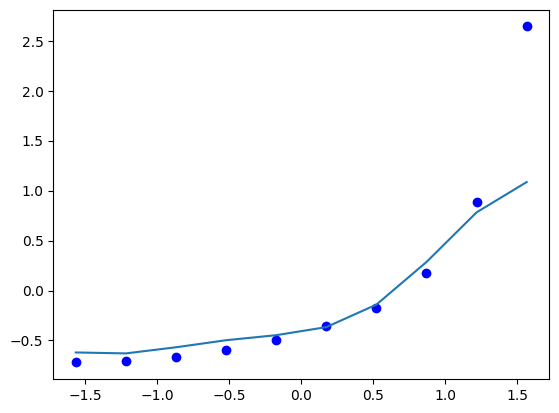

In [16]:
model = SVR()
model.fit(X,y)

predictions = model.predict(X)

plt.scatter(X,y,color = "blue")
plt.plot(X,predictions)
plt.show()

c:\Users\Kemalettin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kemalettin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


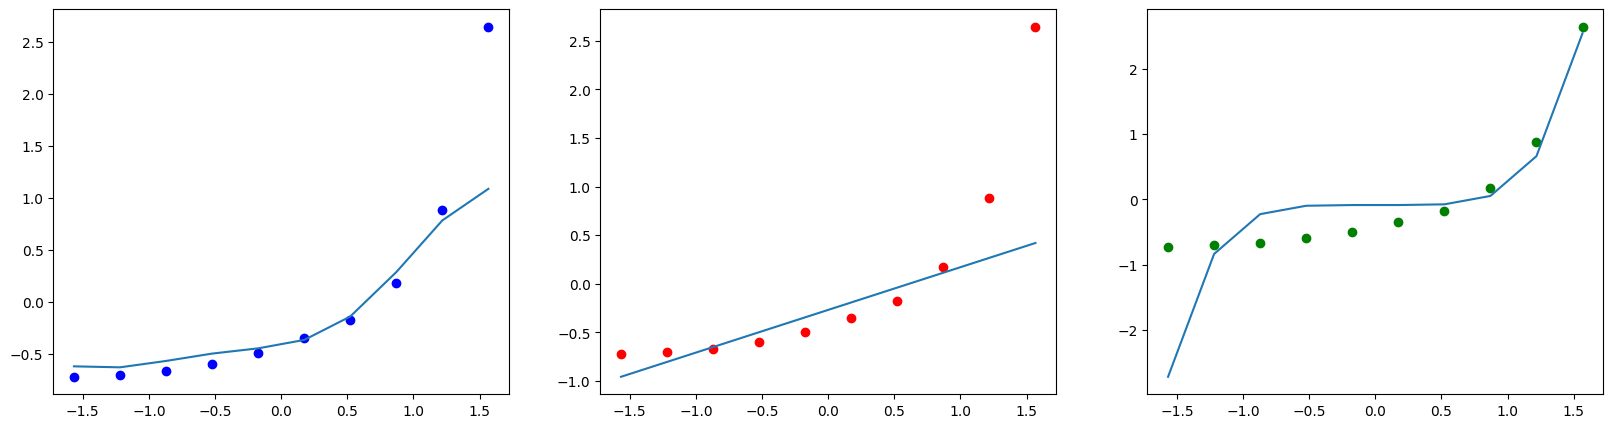

In [25]:
# burada SVR yapısı kendisi içinde farklı parametreler alıyor burada sadece
# modelin sadece linear bir yapı ile çalışmadığını göstermek açısından 
# kernel parametresi ile modelleri kontrol edelim kernel default olarak RBF olur
model2 = SVR(kernel="linear")
model2.fit(X,y)
model3 = SVR(kernel="poly",degree=5)
model3.fit(X,y)

predictions2 = model2.predict(X)
predictions3 = model3.predict(X)

fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].scatter(X,y,color = "blue")
ax[0].plot(X,predictions)

ax[1].scatter(X,y,color = "red")
ax[1].plot(X,predictions2)

ax[2].scatter(X,y,color = "green")
ax[2].plot(X,predictions3)

plt.show()